In [1]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import torch
import torch.utils.data
import numpy as np
import matplotlib.pylab as plt
import matplotlib.image as mpimg
import pandas as pd
from math import sin, cos
from PIL import ImageDraw, Image
import cv2
sys.path.append(os.path.abspath("./Residual-Attention-Network/"))
import seaborn as sns
import cv2
import time
import sklearn.preprocessing
from tqdm.notebook import tqdm
import torch.nn as nn
from sklearn.linear_model import LinearRegression
import torchvision
import paddle.fluid as paddle
import paddlehub as hub
from torchvision.models import resnet18
import sklearn.tree
module = hub.Module(name="faster_rcnn_coco2017")
%autosave 60

[2020-01-20 18:06:58,424] [    INFO] - Installing faster_rcnn_coco2017 module
[2020-01-20 18:06:58,447] [    INFO] - Module faster_rcnn_coco2017 already installed in /home/paperspace/.paddlehub/modules/faster_rcnn_coco2017


Autosaving every 60 seconds


In [2]:
from collections import namedtuple
Label = namedtuple('Label', [

    'name'        , # The name of a car type
    'id'          , # id for specific car type
    'category'    , # The name of the car category, 'SUV', 'Sedan' etc
    'categoryId'  , # The ID of car category. Used to create ground truth images
                    # on category level.
    ])

models = [
    #     name          id   is_valid  category  categoryId
    Label(             'baojun-310-2017',          0,       '2x',          0),
    Label(                'biaozhi-3008',          1,       '2x',          0),
    Label(          'biaozhi-liangxiang',          2,       '2x',          0),
    Label(           'bieke-yinglang-XT',          3,       '2x',          0),
    Label(                'biyadi-2x-F0',          4,       '2x',          0),
    Label(               'changanbenben',          5,       '2x',          0),
    Label(                'dongfeng-DS5',          6,       '2x',          0),
    Label(                     'feiyate',          7,       '2x',          0),
    Label(         'fengtian-liangxiang',          8,       '2x',          0),
    Label(                'fengtian-MPV',          9,       '2x',          0),
    Label(           'jilixiongmao-2015',         10,       '2x',          0),
    Label(           'lingmu-aotuo-2009',         11,       '2x',          0),
    Label(                'lingmu-swift',         12,       '2x',          0),
    Label(             'lingmu-SX4-2012',         13,       '2x',          0),
    Label(              'sikeda-jingrui',         14,       '2x',          0),
    Label(        'fengtian-weichi-2006',         15,       '3x',          1),
    Label(                   '037-CAR02',         16,       '3x',          1),
    Label(                     'aodi-a6',         17,       '3x',          1),
    Label(                   'baoma-330',         18,       '3x',          1),
    Label(                   'baoma-530',         19,       '3x',          1),
    Label(            'baoshijie-paoche',         20,       '3x',          1),
    Label(             'bentian-fengfan',         21,       '3x',          1),
    Label(                 'biaozhi-408',         22,       '3x',          1),
    Label(                 'biaozhi-508',         23,       '3x',          1),
    Label(                'bieke-kaiyue',         24,       '3x',          1),
    Label(                        'fute',         25,       '3x',          1),
    Label(                     'haima-3',         26,       '3x',          1),
    Label(               'kaidilake-CTS',         27,       '3x',          1),
    Label(                   'leikesasi',         28,       '3x',          1),
    Label(               'mazida-6-2015',         29,       '3x',          1),
    Label(                  'MG-GT-2015',         30,       '3x',          1),
    Label(                       'oubao',         31,       '3x',          1),
    Label(                        'qiya',         32,       '3x',          1),
    Label(                 'rongwei-750',         33,       '3x',          1),
    Label(                  'supai-2016',         34,       '3x',          1),
    Label(             'xiandai-suonata',         35,       '3x',          1),
    Label(            'yiqi-benteng-b50',         36,       '3x',          1),
    Label(                       'bieke',         37,       '3x',          1),
    Label(                   'biyadi-F3',         38,       '3x',          1),
    Label(                  'biyadi-qin',         39,       '3x',          1),
    Label(                     'dazhong',         40,       '3x',          1),
    Label(              'dazhongmaiteng',         41,       '3x',          1),
    Label(                    'dihao-EV',         42,       '3x',          1),
    Label(      'dongfeng-xuetielong-C6',         43,       '3x',          1),
    Label(     'dongnan-V3-lingyue-2011',         44,       '3x',          1),
    Label(    'dongfeng-yulong-naruijie',         45,      'SUV',          2),
    Label(                     '019-SUV',         46,      'SUV',          2),
    Label(                   '036-CAR01',         47,      'SUV',          2),
    Label(                 'aodi-Q7-SUV',         48,      'SUV',          2),
    Label(                  'baojun-510',         49,      'SUV',          2),
    Label(                    'baoma-X5',         50,      'SUV',          2),
    Label(             'baoshijie-kayan',         51,      'SUV',          2),
    Label(             'beiqi-huansu-H3',         52,      'SUV',          2),
    Label(              'benchi-GLK-300',         53,      'SUV',          2),
    Label(                'benchi-ML500',         54,      'SUV',          2),
    Label(         'fengtian-puladuo-06',         55,      'SUV',          2),
    Label(            'fengtian-SUV-gai',         56,      'SUV',          2),
    Label(    'guangqi-chuanqi-GS4-2015',         57,      'SUV',          2),
    Label(        'jianghuai-ruifeng-S3',         58,      'SUV',          2),
    Label(                  'jili-boyue',         59,      'SUV',          2),
    Label(                      'jipu-3',         60,      'SUV',          2),
    Label(                  'linken-SUV',         61,      'SUV',          2),
    Label(                   'lufeng-X8',         62,      'SUV',          2),
    Label(                 'qirui-ruihu',         63,      'SUV',          2),
    Label(                 'rongwei-RX5',         64,      'SUV',          2),
    Label(             'sanling-oulande',         65,      'SUV',          2),
    Label(                  'sikeda-SUV',         66,      'SUV',          2),
    Label(            'Skoda_Fabia-2011',         67,      'SUV',          2),
    Label(            'xiandai-i25-2016',         68,      'SUV',          2),
    Label(            'yingfeinidi-qx80',         69,      'SUV',          2),
    Label(             'yingfeinidi-SUV',         70,      'SUV',          2),
    Label(                  'benchi-SUR',         71,      'SUV',          2),
    Label(                 'biyadi-tang',         72,      'SUV',          2),
    Label(           'changan-CS35-2012',         73,      'SUV',          2),
    Label(                 'changan-cs5',         74,      'SUV',          2),
    Label(          'changcheng-H6-2016',         75,      'SUV',          2),
    Label(                 'dazhong-SUV',         76,      'SUV',          2),
    Label(     'dongfeng-fengguang-S560',         77,      'SUV',          2),
    Label(       'dongfeng-fengxing-SX6',         78,      'SUV',          2)

]
car_name2id = {label.name: label for label in models}
car_id2name = {label.id: label for label in models}
import json
from mpl_toolkits.mplot3d import Axes3D
import glob
car_model_file = []
for file in glob.glob("./car_models_json/*"):
    car_model_file.append(file)
car_dic = {}
for file in car_model_file:
    with open(file) as json_file:
        data = json.load(json_file)
        vertices = np.array(data['vertices'])
        triangles = np.array(data['faces']) - 1
        # plt.figure(figsize=(20,10))
        # ax = plt.axes(projection='3d')
        # ax.set_title('car_type: '+data['car_type'])
        # ax.set_xlim([-3, 3])
        # ax.set_ylim([-3, 3])
        # ax.set_zlim([0, 3])
        # ax.plot_trisurf(vertices[:,0], vertices[:,2], triangles, -vertices[:,1], shade=True, color='grey')
        width_pix = vertices[:,0]
        width_min = min(width_pix)
        width_max = max(width_pix)
        width = width_max - width_min
        height_pix = vertices[:,1]
        height_min = min(height_pix)
        height_max = max(height_pix)
        height = height_max - height_min
        length_pix = vertices[:,2]
        length_min = min(length_pix)
        length_max = max(length_pix)
        length = length_max - length_min
        name = file.split('/')
        name = name[2].split('.')
        name = name[0]
        car_dic[name] = [width/2, height/2, length/2]
id_dic = {}
for id in range(79):
    id_dic[id] = car_dic[car_id2name[id].name]
car_dic = id_dic

In [3]:
train = pd.read_csv('./train.csv')
# k is camera instrinsic matrix
k = np.array([[2304.5479, 0,  1686.2379],
           [0, 2305.8757, 1354.9849],
           [0, 0, 1]], dtype = np.float32)

In [4]:
# convert euler angle to rotation matrix
def euler_to_Rot(yaw, pitch, roll):
    Y = np.array([[cos(yaw), 0, sin(yaw)],
                  [0, 1, 0],
                  [-sin(yaw), 0, cos(yaw)]])
    P = np.array([[1, 0, 0],
                  [0, cos(pitch), -sin(pitch)],
                  [0, sin(pitch), cos(pitch)]])
    R = np.array([[cos(roll), -sin(roll), 0],
                  [sin(roll), cos(roll), 0],
                  [0, 0, 1]])
    return np.dot(Y, np.dot(P, R))
def rotate(x, angle):
    x = x + angle
    x = x - (x + np.pi) // (2 * np.pi) * 2 * np.pi
    return x

In [5]:
# #preprocess by cropping
# X_SIZE = 3384
# Y_SIZE = 2710
# PADDING_X, PADDING_Y = 1100, 1000
# X_SIZE+=2*PADDING_X
# Y_SIZE+=2*PADDING_Y
# PADDING_RATIO_X, PADDING_RATIO_Y = PADDING_X/X_SIZE, PADDING_Y/Y_SIZE
# train_csv = pd.read_csv('./train.csv')
# count = 0
# img_count = 0
# df = pd.DataFrame(columns = ['original_name', 'cropped_filename', 'ymin', 'ymax', 'xmin', 'xmax', 'yaw', 'pitch', 'roll', 'x', 'y', 'z'])
# for idx in range(len(train_csv)):
#     img_name = train_csv.loc[idx]['ImageId']
#     pred_string = train_csv.loc[idx]['PredictionString']
#     img = np.zeros((Y_SIZE, X_SIZE, 3))
#     img[PADDING_Y:-PADDING_Y, PADDING_X:-PADDING_X] = plt.imread('./train_images/' + img_name + '.jpg').astype(float)/255
#     #process prediction string
#     items = pred_string.split(' ')
#     model_types, yaws, pitches, rolls, xs, ys, zs = [items[i::7] for i in range(7)]
#     #iterate over each vehcicle
#     for model_type, yaw, pitch, roll, x, y, z in zip(model_types, yaws, pitches, rolls, xs, ys, zs):
#         x_l, y_l, z_l = car_dic[int(model_type)]
#         yaw, pitch, roll, x, y, z = [float(x) for x in [yaw, pitch, roll, x, y, z]]
#         img_x, img_y, img_z = np.dot(k, [x, y, z])
#         #target = np.array([yaw, np.sin(pitch), np.cos(pitch), rotate(roll, np.pi), img_x/10000, img_y/10000, img_z/10]) #result to regress to
#         target = np.array([yaw, np.sin(pitch), np.cos(pitch), rotate(roll, np.pi), x, y, z]) #result to regress to
#         # I think the pitch and yaw should be exchanged
#         yaw, pitch, roll = -pitch, -yaw, -roll
#         Rt = np.eye(4)
#         t = np.array([x, y, z])
#         Rt[:3, 3] = t
#         Rt[:3, :3] = euler_to_Rot(yaw, pitch, roll).T
#         Rt = Rt[:3, :]
#         P = np.array([[0, 0, 0, 1],
#                       [x_l, y_l, -z_l, 1],
#                       [x_l, y_l, z_l, 1],
#                       [-x_l, y_l, z_l, 1],
#                       [-x_l, y_l, -z_l, 1],
#                       [x_l, -y_l, -z_l, 1],
#                       [x_l, -y_l, z_l, 1],
#                       [-x_l, -y_l, z_l, 1],
#                       [-x_l, -y_l, -z_l, 1]]).T

#         # call this function before change the astype
#         img_cor_points = np.dot(k, np.dot(Rt, P)) # calculate 8 corners and center in terms of camera coordinate
#         img_cor_points = img_cor_points.T
#         img_cor_points[:, 0] /= img_cor_points[:, 2] # project onto 2d camera plane
#         img_cor_points[:, 1] /= img_cor_points[:, 2]
#         xmax = np.amax(img_cor_points[:,0]) # calculate 2d box
#         xmin = np.amin(img_cor_points[:,0])
#         ymax = np.amax(img_cor_points[:,1])
#         ymin = np.amin(img_cor_points[:,1])
#         xcenter = img_cor_points[0,0]
#         ycenter = img_cor_points[0,1]
#         if xmin+PADDING_X<0 or xmax+PADDING_X>X_SIZE or ymin+PADDING_Y<0 or ymax+PADDING_Y>Y_SIZE:
#             print(x, y, z, xmax, xmin, ymax, ymin)
#             print(xcenter, ycenter)
#             continue
#         # Crop image
#         img_crop = img[int(ymin)+PADDING_Y:int(ymax)+PADDING_Y, int(xmin)+PADDING_X:int(xmax)+PADDING_X]
#         img_crop = np.clip(img_crop, 0, 1)
#         #input_tensor = img_crop.transpose((2, 0, 1))
#         original_name = './train_images/' + img_name + '.jpg'
#         filename = './Joseph_Dataset/Images/'+"%05d"%count+'.jpg'
#         plt.imsave(filename, img_crop)
#         row = {'original_name': original_name, 'cropped_filename':filename, 'ymin':ymin, 'ymax':ymax, 'ycenter':ycenter, 'xmin':xmin, 'xmax':xmax, 'xcenter':xcenter,
#                'yaw':yaw, 'pitch':pitch, 'roll':roll, 'x':x, 'y':y, 'z':z}
#         df = df.append(row, ignore_index = True)
#         count+=1
#         if count%1000 == 0:
#             print(count, img_count)
#             df.to_csv('./Joseph_Dataset/cropped_annotations.csv')
#     img_count+=1
# df.to_csv('./Joseph_Dataset/cropped_annotations.csv')


In [6]:
# Now begin the initialization of dictionary for image training set
df = pd.read_csv('./Joseph_Dataset/cropped_annotations.csv')
display(df)

,Unnamed: 0,original_name,cropped_filename,ymin,ymax,xmin,xmax,yaw,pitch,roll,x,y,z,xcenter,ycenter
0,0,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00000.jpg,1863.331241,2236.058830,2800.296688,4069.028834,2.575340,-0.254839,3.10256,7.965390,3.20066,11.0225,3351.615317,2024.553856
1,1,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00001.jpg,1801.196377,2033.024638,2511.198068,3183.332931,1.469470,-0.181647,3.12159,9.603320,4.66632,19.3390,2830.625447,1911.371132
2,2,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00002.jpg,1751.173978,1825.995706,1985.578241,2191.953574,1.568650,-0.163072,3.11754,10.390000,11.22190,59.7825,2086.760680,1787.825693
3,3,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00003.jpg,1743.544803,1945.196534,576.675996,967.537618,3.139500,-0.141942,-3.11969,-9.592360,5.13662,24.7337,792.475452,1833.862160
4,4,./train_images/ID_8a6e65317.jpg,./Joseph_Dataset/Images/00004.jpg,1743.687649,1806.683346,1913.203683,2081.185117,2.085780,-0.163068,3.11754,9.833350,13.26890,72.9323,1996.956563,1774.503163
5,5,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00005.jpg,1770.449295,1911.666062,1360.288086,1560.204816,-0.192169,-0.163988,3.12112,-3.174240,6.55331,31.4339,1453.521390,1835.711674
6,6,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00006.jpg,1740.509885,1832.726902,1005.824138,1122.697883,2.963070,-0.112482,-3.13951,-14.726900,10.20770,54.8175,1067.113625,1784.367592
7,7,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00007.jpg,1760.741822,1832.031325,1297.912368,1439.634349,-0.357280,-0.186114,3.10043,-7.498180,10.31120,54.0320,1366.429013,1795.026799
8,8,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00008.jpg,1718.737766,1809.049228,1267.927827,1358.814746,-0.218402,-0.020968,-3.12213,-10.353100,11.24530,63.7140,1311.764261,1761.963932
9,9,./train_images/ID_337ddc495.jpg,./Joseph_Dataset/Images/00009.jpg,1740.376510,1801.636036,920.649756,998.269435,2.847780,-0.195428,3.13394,-22.771100,13.07040,72.2694,960.106391,1772.017773


In [7]:
df = pd.read_csv('./Joseph_Dataset/cropped_annotations.csv') 

## Find xyz using linear algebra methods

In [8]:
np.set_printoptions(precision=2, suppress=True) 
df_regr = df[df['x'] < 100] #remove outliers
#df_regr = df_regr[df_regr['x'] > -40]
df_regr = df_regr[df_regr['y'] < 100] 
df_regr = df_regr[df_regr['z'] < 100]
XZ = df_regr[['x', 'z']].values
Y = df_regr['y'].values
reg = LinearRegression().fit(XZ, Y)
#print(reg.coef_, reg.intercept_)
print('MSE :', np.sum(np.square(reg.predict(XZ)-Y))/len(df_regr))
print(reg.coef_, reg.intercept_)


MSE : 0.26650858997164495
[0.04 0.16] 1.454125396879637


966


(array([2950.,   23.,    8.,    7.,    3.,    3.,    2.,    1.,    1.,
           2.]),
 array([   0.  ,  442.71,  885.42, 1328.12, 1770.83, 2213.54, 2656.24,
        3098.95, 3541.66, 3984.36, 4427.07]),
 <a list of 10 Patch objects>)

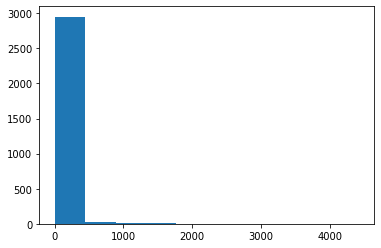

In [9]:
np.set_printoptions(precision=2, suppress=True) 
kinv = np.linalg.inv(k)
def findxyz(img_x, img_y, coeff, offset):
    scalar1 = np.dot(coeff, [np.dot(kinv[0], [img_x, img_y, 1]), 1])
    scalar2 = np.dot(kinv[1], [img_x, img_y, 1])
    z = offset/(scalar2-scalar1)
    x = np.dot(kinv[0], [img_x, img_y, 1])*z
    y = np.dot(kinv[1], [img_x, img_y, 1])*z
    #scalar1 = np.dot(coeff, np.dot(kinv[:2], [img_x, img_y, 1]))
    #scalar2 = np.dot(kinv[2], [img_x, img_y, 1])
    #z_camera = offset/(scalar2-scalar1)
    #x_world, y_world = np.dot(kinv[:2], [img_x, img_y, 1])*z_camera
    #z_world = z_camera*scalar2
    return x, y, z
MSE = 0
errors = []
correct_count = 0
for i in range(3000):
    img_x, img_y, x_true, y_true, z_true = df.iloc[i][['xcenter', 'ycenter', 'x', 'y', 'z']]
    x_pred, y_pred, z_pred = findxyz(img_x, img_y, reg.coef_, reg.intercept_)
    #print('true:', np.array([x_true, y_true, z_true]), 'pred:', np.array([x_pred, y_pred, z_pred]))
    error = ((x_pred - x_true)**2 + (y_pred - y_true)**2 + (z_pred - z_true)**2)**0.5
    actual_dist = (x_true**2 + y_true**2 + z_true**2)**0.5
    if error/actual_dist<0.1:
        correct_count+=1
    errors.append(error)
print(correct_count)
plt.hist(errors)

## Fit DecisionTree

1041


(array([2938.,   57.,    4.,    0.,    0.,    0.,    0.,    0.,    0.,
           1.]),
 array([0.  , 0.78, 1.56, 2.34, 3.12, 3.9 , 4.68, 5.45, 6.23, 7.01, 7.79]),
 <a list of 10 Patch objects>)

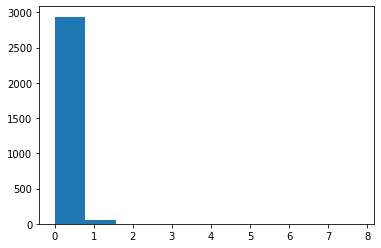

In [10]:
img_xy = df[['xcenter', 'ycenter']].values
xyz = df[['x', 'y', 'z']].values
#tree = sklearn.tree.DecisionTreeRegressor().fit(img_xy[3000:], xyz[3000:])
tree = sklearn.neighbors.KNeighborsRegressor(n_neighbors=10).fit(img_xy[3000:], xyz[3000:])
errors = []
correct_count = 0
for i in range(3000):
    img_x, img_y, x_true, y_true, z_true = df.iloc[i][['xcenter', 'ycenter', 'x', 'y', 'z']]
    #x_pred, y_pred, z_pred = findxyz(img_x, img_y, reg.coef_, reg.intercept_)
    x_pred, y_pred, z_pred = tree.predict([[img_x, img_y]])[0]
    #print('true:', np.array([x_true, y_true, z_true]), 'pred:', np.array([x_pred, y_pred, z_pred]))
    error = ((x_pred - x_true)**2 + (y_pred - y_true)**2 + (z_pred - z_true)**2)**0.5
    actual_dist = (x_true**2 + y_true**2 + z_true**2)**0.5
    if error/actual_dist<0.1:
        correct_count+=1
    errors.append(error/actual_dist)
print(correct_count)
plt.hist(errors)

## Model Detection

In [23]:
X_SIZE = 3384
Y_SIZE = 2710
PADDING_X, PADDING_Y = 500, 500
X_SIZE+=2*PADDING_X
Y_SIZE+=2*PADDING_Y
def pad_img(img, size = (112, 112, 3)):
    padded_img = np.zeros(size)
    pad_center_y = size[0]/2
    pad_center_x = size[1]/2
    if img.shape[0]>img.shape[1]:
        newwidth = int(img.shape[1]/img.shape[0]*size[0]//2*2)
        img = cv2.resize(img, (newwidth, size[0]))
        padded_img[:, int(pad_center_x-newwidth//2):int(pad_center_x+newwidth//2)] = img
    else:
        newheight = int(img.shape[0]/img.shape[1]*size[1]//2*2)
        img = cv2.resize(img, (size[1], newheight))
        padded_img[int(pad_center_y-newheight//2):int(pad_center_y+newheight//2), :] = img
    return padded_img
def iou(box1, box2):
    # each box is xmin, xmax, ymin, ymax
    xmin = max(box1[0], box2[0])
    xmax = min(box1[1], box2[1])
    ymin = max(box1[2], box2[2])
    ymax = min(box1[3], box2[3])
    if xmin>=xmax or ymin>=ymax:
        return 0
    box1area = (box1[1]-box1[0])*(box1[3]-box1[2])
    box2area = (box2[1]-box2[0])*(box2[3]-box2[2])
    intersection = (xmax-xmin)*(ymax-ymin)
    union = box1area+box2area-intersection
    return intersection/union

def find_boundingbox(img_dir): ### paddlehub version, really slow so deprecated
    # set input dict
    test_img_path=img_dir
    #test_img = np.zeros((Y_SIZE, X_SIZE, 3), dtype = 'uint8')
    #test_img[PADDING_Y:-PADDING_Y, PADDING_X:-PADDING_X] = plt.imread(img_dir)#.astype(float)/255
    #padded_path = test_img_path.replace('train_images', 'padded')
    #plt.imsave(padded_path, test_img)
    input_dict = {"image": [test_img_path]}
    # execute predict and print the result
    start = time.time()
    results = module.object_detection(data=input_dict,  use_gpu = False, config = config)
    print(time.time()-start)
    result = results[0]
    carboxes = []
    test_img = plt.imread(img_dir).astype(float)/255
    ego_box = [600, 3384, 2500, 2710]
    for box in result['data']:
        if box['label']!='car':
            continue
        xmin, xmax, ymin, ymax, confidence = box['left'], box['right'], box['top'], box['bottom'], box['confidence']
        if iou(ego_box, [xmin, xmax, ymin, ymax])>0:
            pass
            #print('agh')
        else:
            img_crop = test_img[int(ymin):int(ymax), int(xmin):int(xmax)]
            carboxes.append([img_crop, xmin, xmax, ymin, ymax, confidence])
    return carboxes





In [24]:
original_filenames = glob.glob('./train_images/*.jpg')
img_dir = original_filenames[np.random.randint(0, len(original_filenames))]

In [25]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, box_nms_thresh = 0.3).to('cuda')
model.eval()
pass

0.4570636749267578 seconds


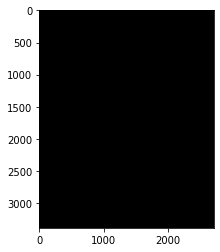

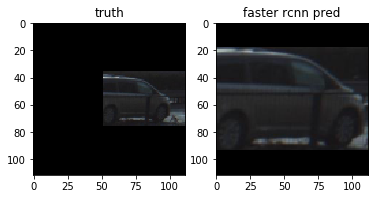

correct confidence: 0.994247555732727
iou: 0.40105185315527875 



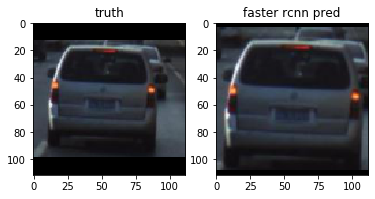

correct confidence: 0.9834643602371216
iou: 0.696252503186318 



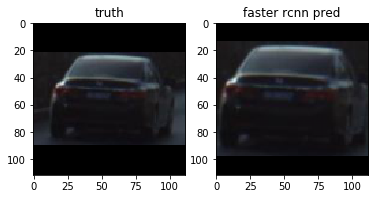

correct confidence: 0.9912372827529907
iou: 0.803175385969185 



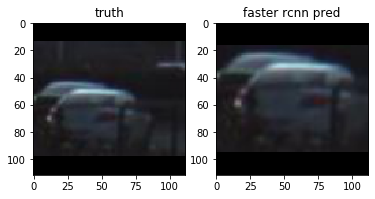

correct confidence: 0.9179477691650391
iou: 0.48963133870223097 



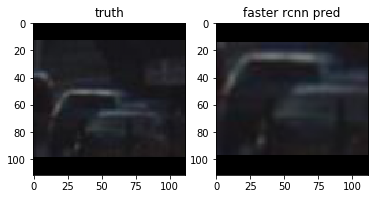

correct confidence: 0.8089478611946106
iou: 0.3957552530553146 



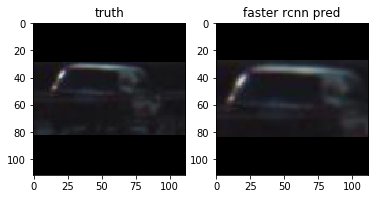

correct confidence: 0.7917600274085999
iou: 0.5061484216737925 



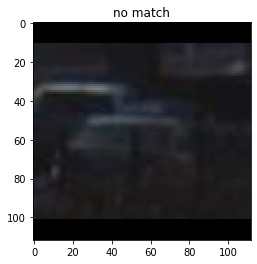

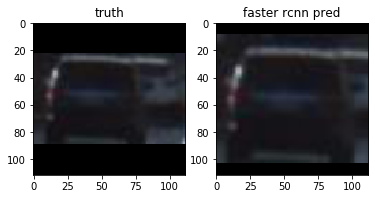

correct confidence: 0.9517769813537598
iou: 0.7288125851523393 

10 cars detected 8 cars are actually present
matched 7 images


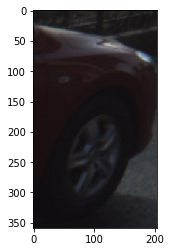

wrong confidence: 0.9986612796783447
ignore mask overlap 0.0


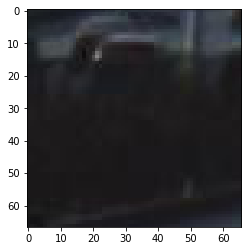

wrong confidence: 0.6310592889785767
ignore mask overlap 0.0


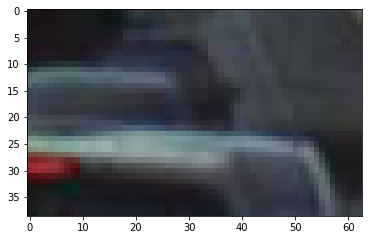

wrong confidence: 0.5580043792724609
ignore mask overlap 0.0


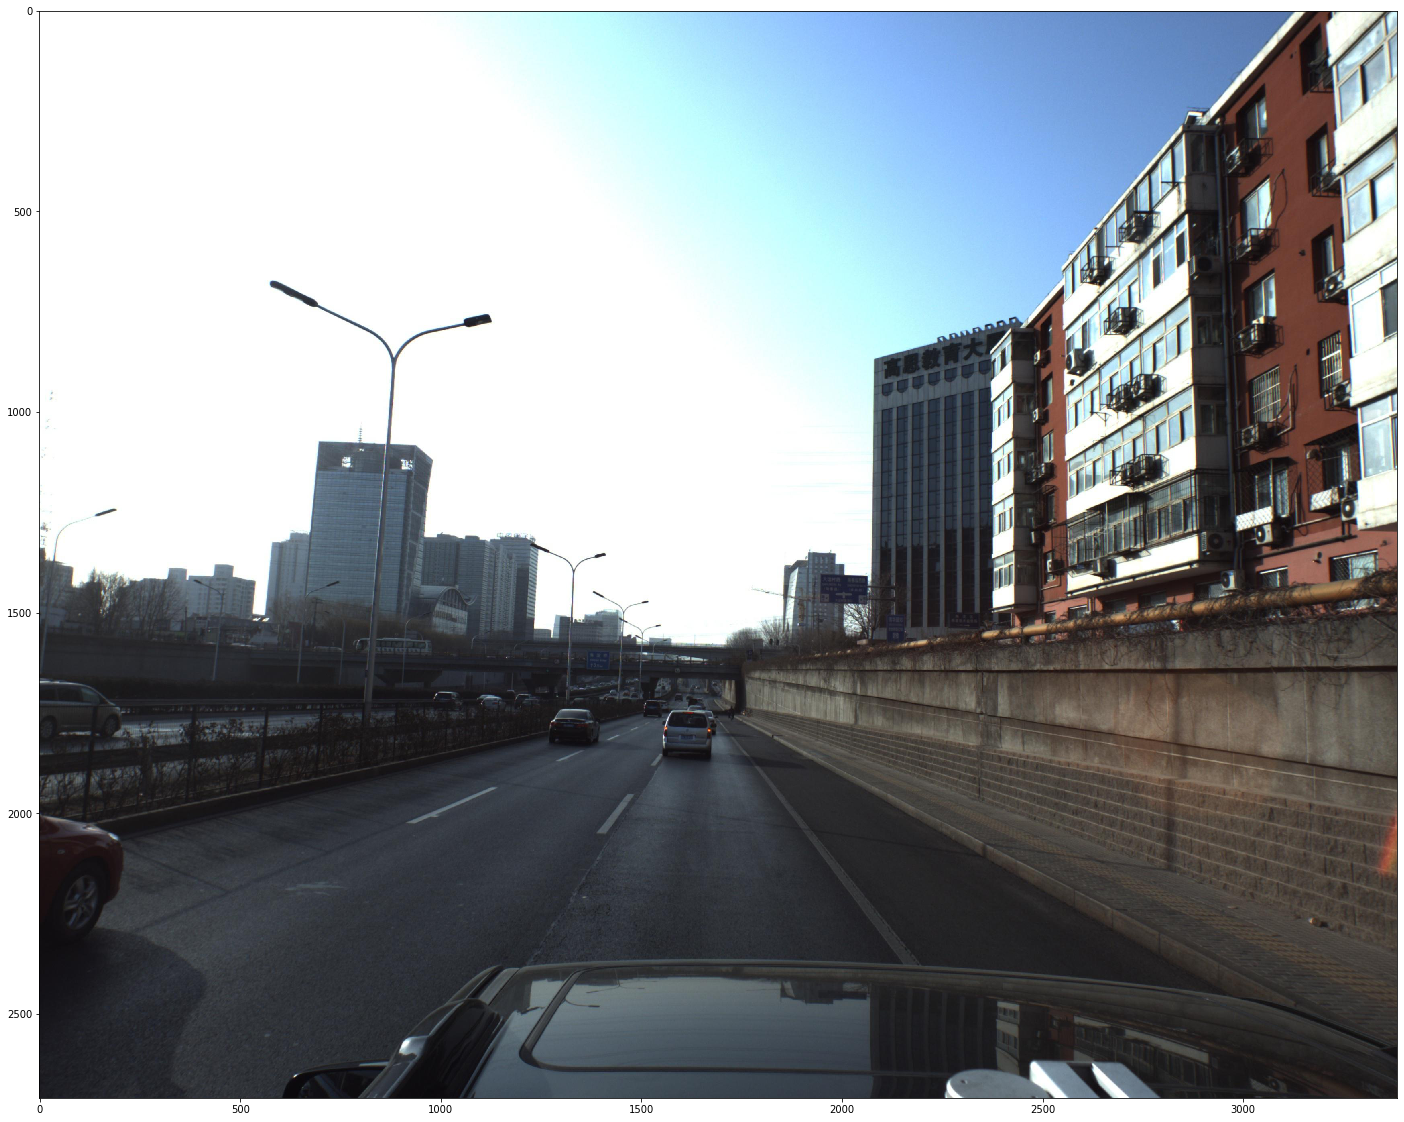

In [26]:
begin = time.time()
boxes = find_boundingbox(img_dir, 0.5)
print((time.time()-begin)/1, 'seconds')

predboxes = []
mask_dir = img_dir.replace('train_images', 'train_masks')
if len(glob.glob(mask_dir))>0:
    ignore_mask = plt.imread(mask_dir).mean(axis = 2)/255
else:
    ignore_mask = np.zeros((3384, 2710, 3))
plt.imshow(ignore_mask)
plt.show()
for predbox in boxes:
    img_crop = predbox[0]
    xmin, xmax, ymin, ymax = predbox[1:-1]
    if np.sum(ignore_mask[int(ymin):int(ymax), int(xmin):int(xmax)])>(int(xmax)-int(xmin))*(int(ymax)-int(ymin))*0.25:
        print('overlap with ignore mask', np.sum(ignore_mask[int(ymin):int(ymax), int(xmin):int(xmax)])/((int(xmax)-int(xmin))*(int(ymax)-int(ymin))))
    else:
        predboxes.append(predbox)

filenames, xmin, xmax, xcenter, ymin, ymax, ycenter, x, y, z, yaw, pitch, roll = df.loc[df['original_name']==img_dir][['cropped_filename','xmin','xmax', 'xcenter', 'ymin','ymax', 'ycenter', 'x', 'y', 'z', 'yaw', 'pitch', 'roll']].values.T
truthboxes = list(zip(xmin, xmax, ymin, ymax))
truthbox_sizes = [(xmax-xmin)*(ymax-ymin) for xmin, xmax, ymin, ymax in truthboxes]
truthbox_order = np.argsort(truthbox_sizes)[::-1] #sort the cars from big to small
truthboxes = [truthboxes[j] for j in truthbox_order]
#print(truthboxes)
predboxes_matches = []
count_correct, count_incorrect = 0, 0
for j, box2 in enumerate(truthboxes):
    idx = truthbox_order[j] # index before sorting
    crop_truth = plt.imread(filenames[idx]).astype(float)/255
    # targets for csv
    row = {'original_name': img_dir, 'truth_filename': filenames[idx], 'ycenter':ycenter[idx], 'xcenter':xcenter[idx], 'yaw':yaw[idx], 'pitch':pitch[idx], 'roll':roll[idx], 'x':x[idx], 'y':y[idx], 'z':z[idx]}
    ious = np.zeros((len(predboxes)))
    for i, box1 in enumerate(predboxes):
        if i not in predboxes_matches:
            crop_pred, box1 = box1[0], box1[1:-1]
            ious[i] = iou(box1, box2)
    if np.amax(ious)>0:
        match = np.argmax(ious)
        predboxes_matches.append(match)
        plt.subplot(121)
        plt.imshow(pad_img(crop_truth))
        plt.title('truth')
        plt.subplot(122)
        plt.imshow(pad_img(predboxes[match][0]))
        plt.title('faster rcnn pred')
        plt.show()
        #start writing into csv
        row['xmin'], row['xmax'], row['ymin'], row['ymax'], row['confidence'] = predboxes[match][1:]
        print('correct confidence:', predboxes[match][-1])
        print('iou:', np.amax(ious),  '\n')
        pred_filename =  './Joseph_Dataset/cropped_rcnn_Images/'+"%05d"%count_correct+'.jpg'
        #plt.imsave(pred_filename, predboxes[match][0])
        row['pred_filename'] = pred_filename
        #df_correct = df_correct.append(row, ignore_index = True)
        count_correct+=1
        #end writing into csv
    else: # when image is not matched
        plt.imshow(pad_img(crop_truth))
        plt.title('no match')
        plt.show()
print(len(predboxes), 'cars detected', len(truthboxes), 'cars are actually present')
print('matched', count_correct, 'images')
for i, box1 in enumerate(predboxes):
    if i not in predboxes_matches:
        crop_pred, box1, confidence = box1[0], box1[1:-1], box1[-1]
        plt.imshow(crop_pred)
        plt.show()
        print('wrong confidence:', confidence)
        # starting writing into csv
        row = {}
        pred_filename = './Joseph_Dataset/incorrect_images/'+"%05d"%count_incorrect+'.jpg'
        row['xmin'], row['xmax'], row['ymin'], row['ymax'] = box1
        row['original_name'], row['pred_filename'], row['confidence'] = img_dir, pred_filename, confidence
        #check ignore mask overlap
        xmin, xmax, ymin, ymax = box1
        print('ignore mask overlap', np.sum(ignore_mask[int(ymin):int(ymax), int(xmin):int(xmax)])/(int(xmax)-int(xmin))/(int(ymax)-int(ymin)))
        #plt.imsave(pred_filename, crop_pred)
        #df_incorrect = df_incorrect.append(row, ignore_index = True)
        count_incorrect+=1
        #end writing into csv
        ### do ensembling on this later
original_img = plt.imread(img_dir)
plt.figure(figsize = (30, 20))
plt.imshow(original_img)
plt.show()





In [42]:
# df_correct = pd.DataFrame(columns = ['original_name', 'truth_filename', 'pred_filename', 'ymin', 'ymax', 'ycenter', 'xmin', 'xmax', 'xcenter', 'yaw', 'pitch', 'roll', 'x', 'y', 'z', 'confidence'])
# df_incorrect = pd.DataFrame(columns = ['original_name', 'pred_filename', 'xmin', 'xmax', 'ymin', 'ymax', 'confidence'])
# original_filenames = glob.glob('./train_images/*.jpg')
# count_correct, count_incorrect = 0, 0
# for filecount, img_dir in enumerate(tqdm(original_filenames)):
#     ## run faster rcnn
#     boxes = find_boundingbox(img_dir)
#     ## go thru ignore masks
#     predboxes = []
#     mask_dir = img_dir.replace('train_images', 'train_masks')
#     if len(glob.glob(mask_dir))>0:
#         ignore_mask = plt.imread(mask_dir).mean(axis = 2)/255
#     else:
#         ignore_mask = np.zeros((3384, 2710, 3))
#     #plt.imshow(ignore_mask)
#     #plt.show()
#     for predbox in boxes:
#         img_crop = predbox[0]
#         xmin, xmax, ymin, ymax = predbox[1:-1]
#         if np.sum(ignore_mask[int(ymin):int(ymax), int(xmin):int(xmax)])>(int(xmax)-int(xmin))*(int(ymax)-int(ymin))*0.3:
#             pass
#             #print('overlap with ignore mask', np.sum(ignore_mask[int(ymin):int(ymax), int(xmin):int(xmax)])/((int(xmax)-int(xmin))*(int(ymax)-int(ymin))))
#         else:
#             predboxes.append(predbox)
#     if len(predboxes) == 0:
#         continue
#     ## ignore masks completed
#     filenames, xmin, xmax, xcenter, ymin, ymax, ycenter, x, y, z, yaw, pitch, roll = df.loc[df['original_name']==img_dir][['cropped_filename','xmin','xmax', 'xcenter', 'ymin','ymax', 'ycenter', 'x', 'y', 'z', 'yaw', 'pitch', 'roll']].values.T
#     ## sort the ground truth bounding boxes based on size
#     truthboxes = list(zip(xmin, xmax, ymin, ymax))
#     truthbox_sizes = [(xmax-xmin)*(ymax-ymin) for xmin, xmax, ymin, ymax in truthboxes]
#     truthbox_order = np.argsort(truthbox_sizes)[::-1] #sort the cars from big to small
#     truthboxes = [truthboxes[j] for j in truthbox_order]
#     predboxes_matches = [] ## prediction boxes already matched
#     for j, box2 in enumerate(truthboxes):
#         idx = truthbox_order[j] # index before sorting
#         crop_truth = plt.imread(filenames[idx]).astype(float)/255
#         # targets for csv
#         row = {'original_name': img_dir, 'truth_filename': filenames[idx], 'ycenter':ycenter[idx], 'xcenter':xcenter[idx], 'yaw':yaw[idx], 'pitch':pitch[idx], 'roll':roll[idx], 'x':x[idx], 'y':y[idx], 'z':z[idx]}
#         ious = np.zeros((len(predboxes)))
#         for i, box1 in enumerate(predboxes):
#             if i not in predboxes_matches:
#                 crop_pred, box1 = box1[0], box1[1:-1]
#                 ious[i] = iou(box1, box2)
#         if np.amax(ious)>0.05:
#             match = np.argmax(ious)
#             predboxes_matches.append(match)
#             #plt.subplot(121)
#             #plt.imshow(pad_img(crop_truth))
#             #plt.title('truth')
#             #plt.subplot(122)
#             #plt.imshow(pad_img(predboxes[match][0]))
#             #plt.title('faster rcnn pred')
#             #plt.show()
#             #start writing into csv
#             row['xmin'], row['xmax'], row['ymin'], row['ymax'], row['confidence'] = predboxes[match][1:]
#             #print('correct confidence:', predboxes[match][-1])
#             #print('iou:', np.amax(ious),  '\n')
#             pred_filename =  './Joseph_Dataset/cropped_rcnn_Images/'+"%05d"%count_correct+'.jpg'
#             plt.imsave(pred_filename, predboxes[match][0])
#             row['pred_filename'] = pred_filename
#             df_correct = df_correct.append(row, ignore_index = True)
#             count_correct+=1
#             #end writing into csv
#         else: # when image is not matched
#             pass
#             #plt.imshow(pad_img(crop_truth))
#             #plt.title('no match')
#             #plt.show()
#     #print(len(predboxes), 'cars detected', len(truthboxes), 'cars are actually present')
#     #print('matched', count, 'images')
#     for i, box1 in enumerate(predboxes):
#         if i not in predboxes_matches:
#             crop_pred, box1, confidence = box1[0], box1[1:-1], box1[-1]
#             #plt.imshow(crop_pred)
#             #plt.show()
#             #print('wrong confidence:', confidence)
#             # starting writing into csv
#             row = {}
#             pred_filename = './Joseph_Dataset/incorrect_images/'+"%05d"%count_incorrect+'.jpg'
#             row['xmin'], row['xmax'], row['ymin'], row['ymax'] = box1
#             row['original_name'], row['pred_filename'], row['confidence'] = img_dir, pred_filename, confidence
#             plt.imsave(pred_filename, crop_pred)
#             df_incorrect = df_incorrect.append(row, ignore_index = True)
#             count_incorrect+=1
#             #end writing into csv
#             ### do ensembling on this later
#     #original_img = plt.imread(img_dir)
#     #plt.figure(figsize = (30, 20))
#     #plt.imshow(original_img)
#     #plt.show()
#     if filecount%100 == 0:
#         print(filecount, 'photos processed')
#         df_correct.to_csv('./Joseph_Dataset/cropped_rcnn_annotations.csv')
#         df_incorrect.to_csv('./Joseph_Dataset/incorrect_rcnn_preds.csv')
# df_correct.to_csv('./Joseph_Dataset/cropped_rcnn_annotations.csv')
# df_incorrect.to_csv('./Joseph_Dataset/incorrect_rcnn_preds.csv')





In [31]:
model.

{'original_name': './train_images/ID_0257049fc.jpg',
 'truth_filename': './Joseph_Dataset/Images/41861.jpg',
 'ycenter': 1767.9603467933914,
 'xcenter': 1416.9758521489305,
 'yaw': -3.0981099999999997,
 'pitch': -0.11666300000000002,
 'roll': 3.10338,
 'x': -9.0555,
 'y': 13.8807,
 'z': 77.5038}

78